# INSTALL JULIA - COLAB

PEGUE O SCRIPT DE TEMPLATE [AQUI](https://colab.research.google.com/drive/1lLHnAUl1kqPB6Fc1tF9r19om24DbYYFh)!

In [1]:
# %%shell
# set -e

# #---------------------------------------------------#
# JULIA_VERSION="1.10.4" # any version ≥ 0.7.0
# JULIA_PACKAGES="IJulia BenchmarkTools Plots"
# JULIA_NUM_THREADS=2
# #---------------------------------------------------#

# if [ -z `which julia` ]; then
# # Install Julia
# JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
# echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
# BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
# URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
# wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
# tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
# rm /tmp/julia.tar.gz

# # Install Packages
# for PKG in `echo $JULIA_PACKAGES`; do
#     echo "Installing Julia package $PKG..."
#     julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
# done

# # Install kernel and rename it to "julia"
# echo "Installing IJulia kernel..."
# julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
#     "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
# KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
# KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
# mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

# echo ''
# echo "Successfully installed `julia -v`!"
# echo "Please reload this page (press Ctrl+R or F5) then"
# echo "jump to the 'Checking the Installation' section."
# fi

In [2]:
versioninfo()

Julia Version 1.10.4
Commit 48d4fd4843 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 6 × Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 6 virtual cores)


# PROJETO 1 - ANALISE DE ALGORITMO

In [3]:
using Plots
using BenchmarkTools

## SEARCH FUNTIONS

In [4]:
# Simple linear search function
function simple_search(vector, key)
    for i in 1:length(vector)
        if key == vector[i] 
            return i # Returns the index where the key was found
        end
    end
    return -1 # Returns -1 if the key is not found
end

simple_search (generic function with 1 method)

In [5]:
# Optimized linear search function
function optimized_search(vector, key)
    for i in 1:length(vector)
        if key == vector[i]
            return i  # Returns the index where the key was found
        elseif key < vector[i]
            return -1  # Returns -1 if the key is not found
        end
    end
    return -1  # Returns -1 if the key is not found
end

optimized_search (generic function with 1 method)

In [6]:
# Binary search function
function binary_search(vector, key)
    low, high = 1, length(vector)

    while low <= high
        mid = div(low + high, 2)
        if vector[mid] == key
            return mid  # Returns the index where the key was found
        elseif vector[mid] < key
            low = mid + 1
        else
            high = mid - 1
        end
    end
    return -1 # Returns -1 if the key is not found
end

binary_search (generic function with 1 method)

## VECS & LISTS

In [7]:
# VARS
count = 1

n_values = [10^i for i in 4:7]  # Vectors Sizes
q_values = [10^i for i in 2:5]  # Amount of Keys

# Initialize the list of vectors and keys
vector_list = [rand(1:10^5, n) for n in n_values]
key_list = [collect(1:1:q) for q in q_values] # K2[1-100], ... , K5[1-10^5]

# Initialize the list of timers
time_simple_search = zeros(length(n_values), length(q_values))
time_optimized_search = zeros(length(n_values), length(q_values))
time_binary_search = zeros(length(n_values), length(q_values))
time_sort = zeros(length(n_values))

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

## BENCHMARK

In [8]:
# Simple linear search - Benchmarking
for i in 1:length(vector_list)  # For each vector size
    for j in 1:length(key_list)  # For each key numbers
        start = time_ns()
        for c in 1:count
            [simple_search(vector_list[i], k) for k in key_list[j]]
        end 
        time_simple_search[i, j] = (time_ns() - start) / 1e9
    end
end

time_simple_search

4×4 Matrix{Float64}:
 0.0570984  0.0029099  0.0274961  0.275244
 0.0021554  0.0188129  0.19511    1.95807
 0.0040898  0.0452038  0.383342   3.95723
 0.0029156  0.03175    0.321842   3.32469

In [9]:
# Sorting the vectors - Benchmarking
for i in 1:length(vector_list)   # For each vector size
    start = time_ns()
    for c in 1:count
        vector_list[i] = sort(vector_list[i])
    end
    time_sort[i]= (time_ns() - start) / 1e9
end

time_sort

4-element Vector{Float64}:
 0.0116148
 0.0013131
 0.0065148
 0.0747451

In [10]:
vector_list

4-element Vector{Vector{Int64}}:
 [16, 18, 23, 24, 37, 54, 68, 81, 107, 107  …  99924, 99930, 99930, 99939, 99964, 99967, 99978, 99983, 99996, 99998]
 [2, 4, 4, 4, 7, 8, 8, 8, 8, 8  …  99989, 99991, 99992, 99993, 99994, 99994, 99994, 99995, 99999, 99999]
 [1, 1, 1, 1, 1, 1, 1, 2, 2, 2  …  99999, 99999, 99999, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]

In [11]:
# Optimized Linear search - Benchmarking
for i in 1:length(vector_list)   # For each vector size
    for j in 1:length(key_list)  # For each key numbers
        start = time_ns()
        for c in 1:count
            [optimized_search(vector_list[i], k) for k in key_list[j]]
        end
        time_optimized_search[i, j] = (time_ns() - start) / 1e9
    end
end

time_optimized_search

4×4 Matrix{Float64}:
 0.0448119  0.0001134  0.0031927    0.28472
 3.04e-5    0.0003705  0.0282123    2.7025
 6.0e-5     0.0026358  0.267347    31.3905
 0.0003018  0.0268912  2.97832    401.264

In [12]:
# Binary search - Benchmarking
for i in 1:length(vector_list)   # For each vector size
    for j in 1:length(key_list)  # For each key numbers
        start = time_ns()
        for c in 1:count
            [binary_search(vector_list[i], k) for k in key_list[j]]
        end
        time_binary_search[i, j] = (time_ns() - start) / 1e9
    end
end

time_binary_search

4×4 Matrix{Float64}:
 0.052358  0.0001176  0.0008299  0.174163
 3.24e-5   0.000126   0.0010976  0.0108667
 3.4e-5    0.0001186  0.001224   0.0152949
 0.000102  0.0001752  0.0017674  0.013841

## PLOTS

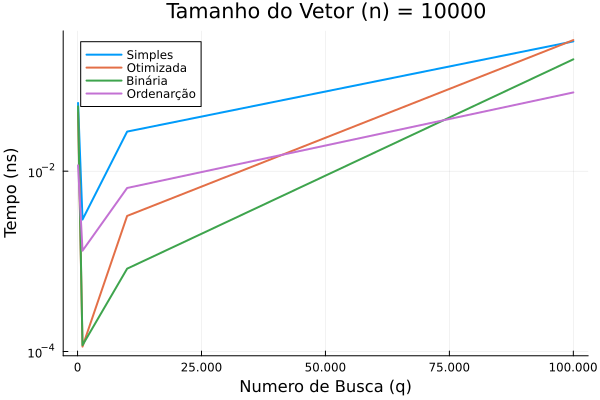

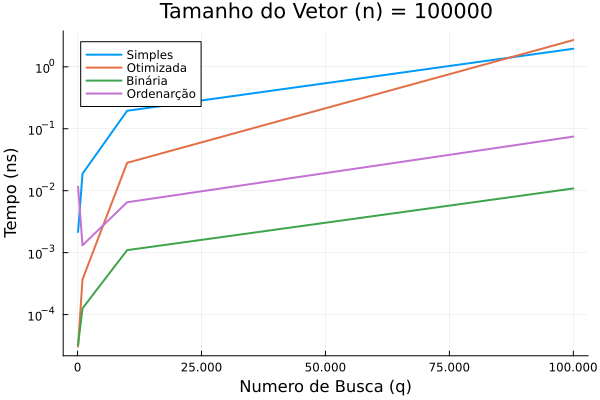

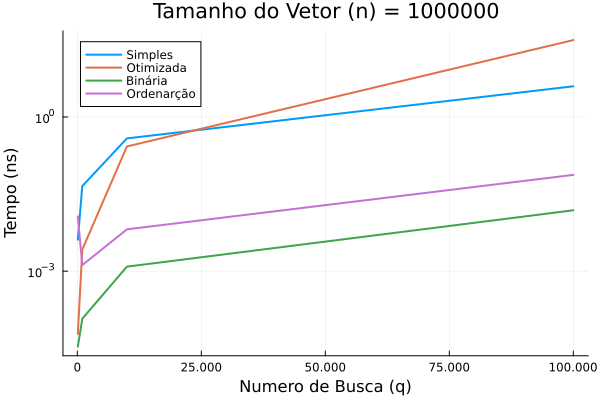

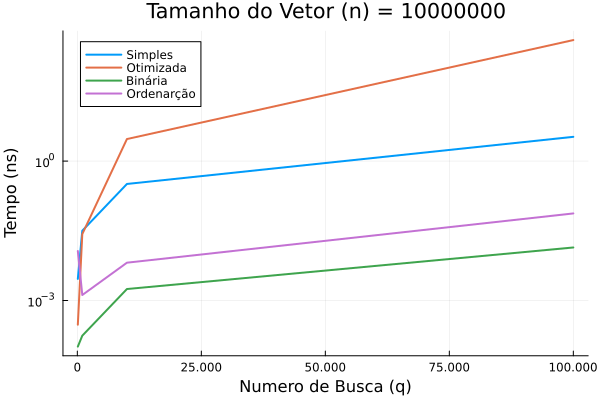

In [13]:
xtick_positions = [0, 25000, 50000, 75000, 10^5]
xtick_labels = ["0", "25.000", "50.000", "75.000", "100.000"]

# Ploting graphics
for i in 1:4
    p = plot(
        q_values,
        time_simple_search[i, :],
        label = "Simples",
        xlabel = "Numero de Busca (q)",
        ylabel = "Tempo (ns)",
        title = "Tamanho do Vetor (n) = $(n_values[i])",
        legend = :topleft,
        xticks = (xtick_positions, xtick_labels),
        # yscale = :log10,  #log scale
        lw = 2
    )
    plot!(q_values, time_optimized_search[i, :], label = "Otimizada", lw = 2)
    plot!(q_values, time_binary_search[i, :], label = "Binária", lw = 2)
    plot!(q_values, time_sort, label = "Ordenarção", lw = 2)

    display(p)
    savefig(p, "../imgs/n_size/10^$(i+3).png")
end

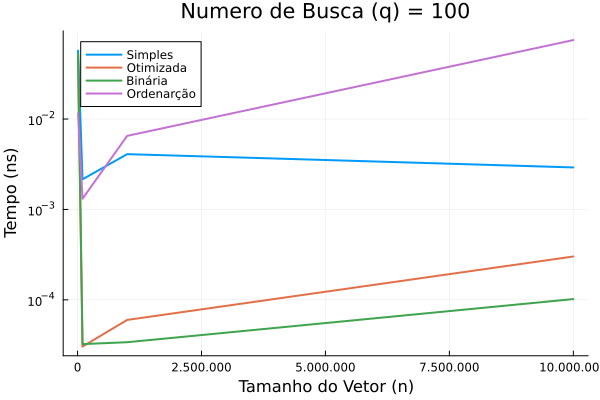

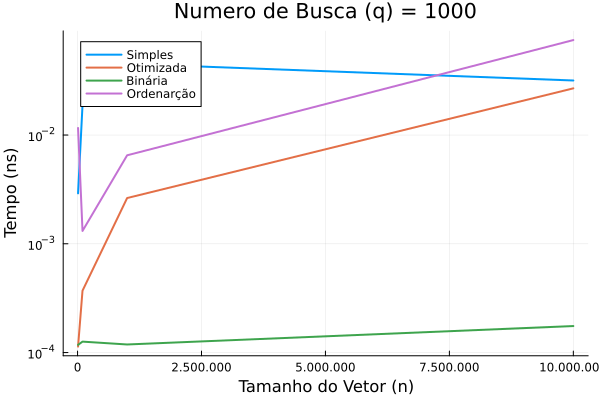

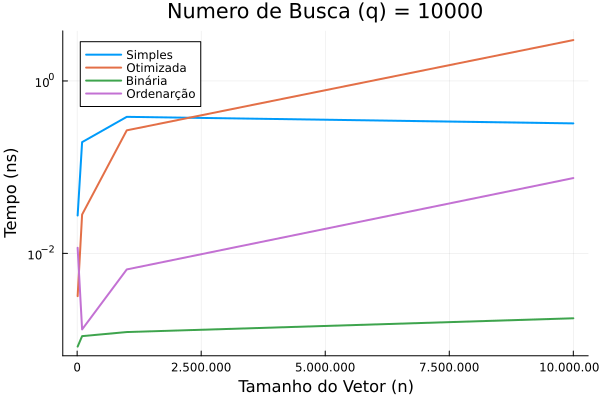

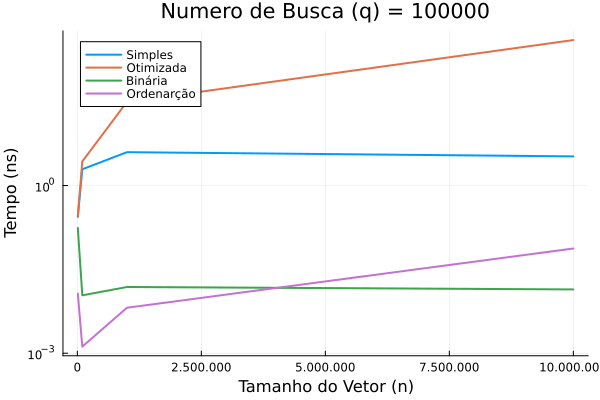

In [23]:
xtick_positions = [0, 2500000, 5000000, 7500000, 10^7]
xtick_labels = ["0", "2.500.000", "5.000.000", "7.500.000", "10.000.000"]

# Ploting graphics
for i in 1:4
    p = plot(
        n_values,
        time_simple_search[:, i],
        label = "Simples",
        xlabel = "Tamanho do Vetor (n)",
        ylabel = "Tempo (ns)",
        title = "Numero de Busca (q) = $(q_values[i])",
        legend = :topleft,
        xticks = (xtick_positions, xtick_labels),
        yscale = :log10,  #log scale
        lw = 2
    )
    plot!(n_values, time_optimized_search[:, i], label = "Otimizada", lw = 2)
    plot!(n_values, time_binary_search[:, i], label = "Binária", lw = 2)
    plot!(n_values, time_sort, label = "Ordenarção", lw = 2)

    display(p)
    savefig(p, "../imgs/q_size/10^$(i+1).png")
end